In [11]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display

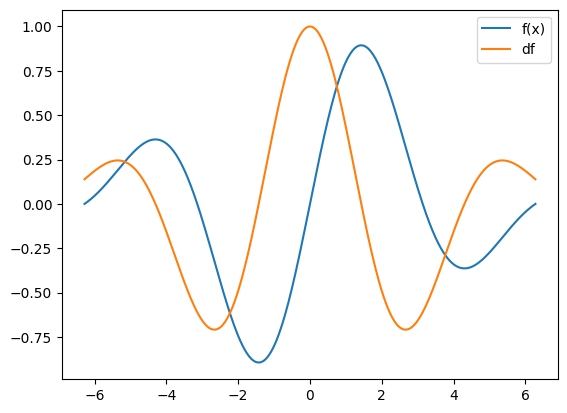

In [12]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

plt.plot(x, fx, x, df)
plt.legend(["f(x)", "df"])

In [13]:
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
    return np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

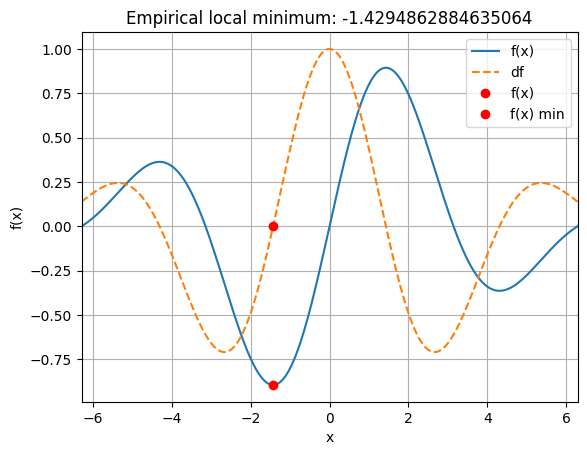

In [14]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 1000

for i in range(epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x)', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

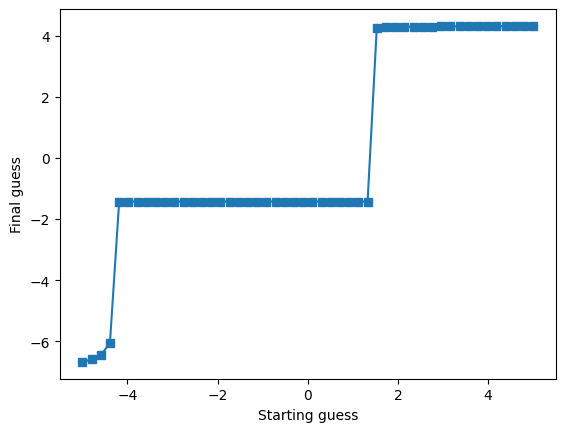

In [16]:
startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

for idx, localmin in enumerate(startlocs):

    for i in range(epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad

    finalres[idx] = localmin

plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

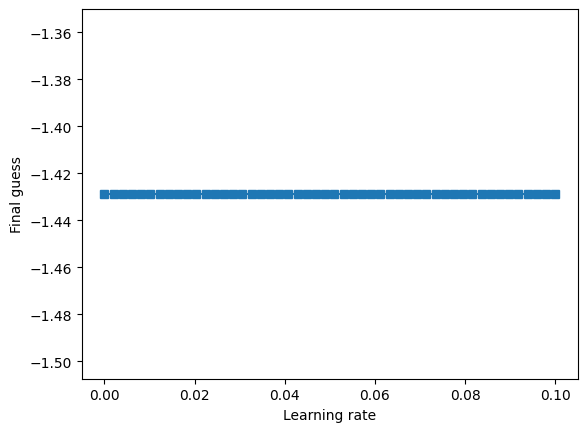

In [22]:
learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

for idx, learningRage in enumerate(learningrates):

    localmin = 0

    for i in range(epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad

    finalres[idx] = localmin

plt.plot(learningrates, finalres, 's-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [32]:
learningrates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10,500,40))

finalres = np.zeros((len(learningrates),len(training_epochs)))

for Lidx, learningRate in enumerate(learningrates):

    for Eidx, trainEpochs in enumerate(training_epochs):

        localmin = 0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin -= learningRate * grad

        finalres[Lidx,Eidx] = localmin